In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

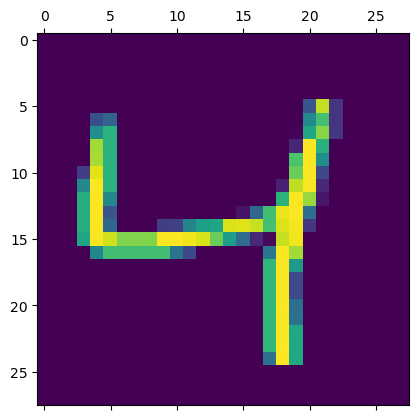

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
## CONVERT VALUES RANGING FROM O T0 255 INTO 0 TO 1 BY DIVIDING IT WITH 255

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
## TO CONVERT 28 * 28 GRID INTO A SINGLE DIMENSIONAL ARRAY INPUT OF 784 ELEMENTS

In [14]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened.shape

(10000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
## Create a simple neural network only consist of two layer, input layer with 784 elements and output layer with 10 element

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 694us/step - loss: 0.4701 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 1s 650us/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 656us/step - loss: 0.2734 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.2671 - accuracy: 0.9256


In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 603us/step - loss: 0.2657 - accuracy: 0.9263


[0.265729695558548, 0.9262999892234802]

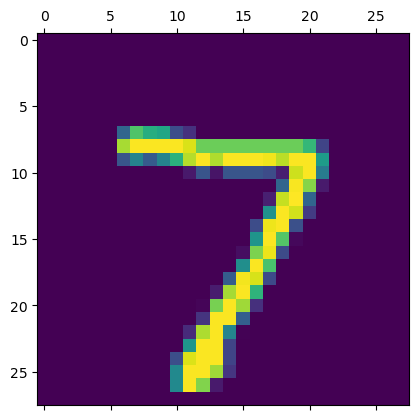

In [21]:
plt.matshow(X_test[0])

In [22]:
y_pred= model.predict(X_test_flattened)
y_pred[0]

array([2.7717978e-02, 3.8848987e-07, 4.2444855e-02, 9.6431839e-01,
       2.2601485e-03, 9.5493913e-02, 1.4342244e-06, 9.9979973e-01,
       9.5137417e-02, 5.9254634e-01], dtype=float32)

In [23]:

np.argmax(y_pred[0])

7

In [24]:
## convert whole values into concrete labels

In [25]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [27]:
cm=tf.math.confusion_matrix(y_test,y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   8,    9,  925,   16,    8,    3,   11,   10,   39,    3],
       [   4,    0,   19,  926,    0,   20,    2,   11,   23,    5],
       [   1,    1,    5,    0,  922,    0,    9,    4,   11,   29],
       [   9,    3,    4,   38,   11,  765,   12,    7,   36,    7],
       [  11,    3,    6,    1,    7,   13,  913,    2,    2,    0],
       [   1,    5,   21,    9,    7,    0,    0,  953,    5,   27],
       [   7,    7,    7,   20,    9,   24,    8,   11,  877,    4],
       [  11,    7,    1,   12,   36,    6,    0,   23,    9,  904]])>

In [28]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'ACTUAL')

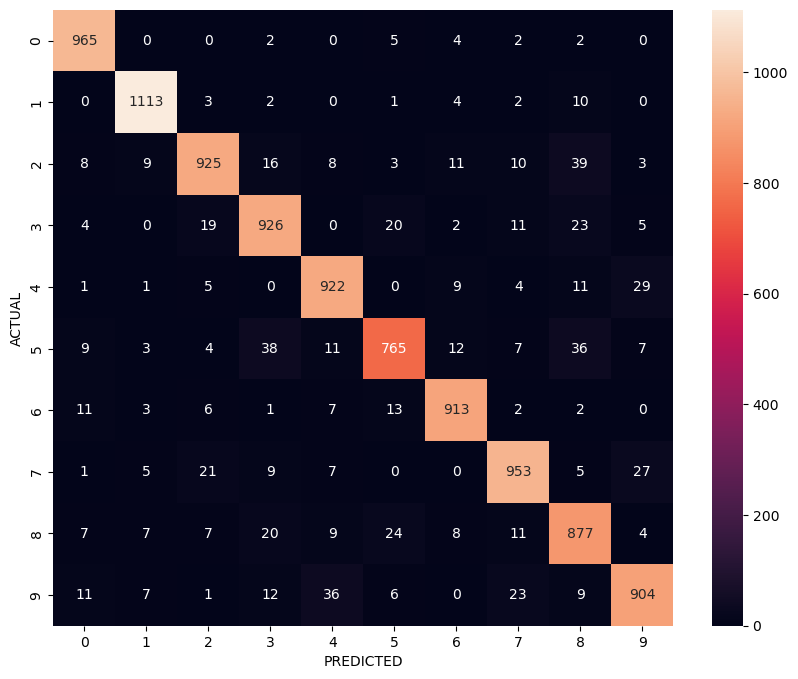

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.show
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

In [30]:
## Using hidden layer

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.2757 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.1241 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.0673 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.0533 - accuracy: 0.9837


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 680us/step - loss: 0.1008 - accuracy: 0.9692


[0.10081564635038376, 0.9692000150680542]

In [36]:
y_pred=model.predict(X_test_flattened)

In [37]:
y_pred[0]

array([9.0342760e-04, 2.9987097e-04, 7.9864478e-01, 9.2439854e-01,
       1.7636155e-05, 4.2879581e-04, 4.8471795e-09, 9.9993944e-01,
       1.6686589e-02, 4.2300290e-01], dtype=float32)

In [38]:
np.argmax(y_pred[0])

7

In [39]:
y_pred_labels= [np.argmax(i) for i in y_pred]

In [40]:
y_pred_labels[0]

7

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)


Text(95.72222222222221, 0.5, 'Truth')

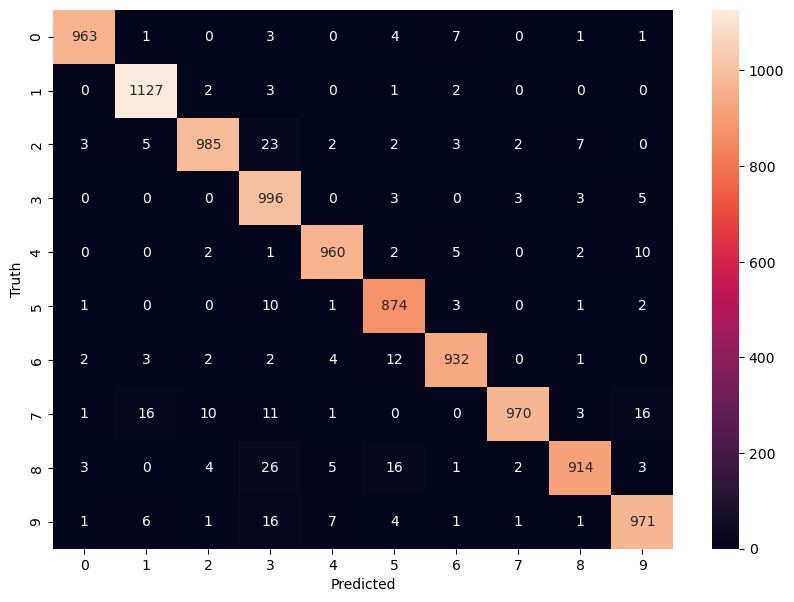

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')